# Data Mining and Probabilistic Reasoning, WS18/19


Dr. Gjergji Kasneci, The University of Tübingen

-----
## Data Spliting & Cross-Validation
-----

###### Date 19.11.18

Teaching assistants:

 - Vadim Borisov (vadim.borisov@uni-tuebingen.de)

 - Johannes Haug (johannes-christian.haug@uni-tuebingen.de)

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import matplotlib
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    import os
    os.system('pip install seaborn')

plt.style.use('ggplot')
plt.figure(figsize=(13, 10))

# ignore warnings 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# Version check... 

In [2]:
print('Scikit-learn version:', sklearn.__version__, '>= 0.20.0')
print('Pandas version:', pd.__version__,'>= 0.23.4')
print('Numpy version:', np.__version__,'>= 1.15.2')
print('Matplotlib version:', matplotlib.__version__,'>= 3.0.0')

Scikit-learn version: 0.20.0 >= 0.20.0
Pandas version: 0.23.4 >= 0.23.4
Numpy version: 1.15.2 >= 1.15.2
Matplotlib version: 3.0.0 >= 3.0.0


In [3]:
# load dataset
df = pd.read_csv('./data/cleaned_german_credit_data.csv', index_col=0)

In [4]:
df.head()

,Age,Sex,Job,Credit amount,Duration,Risk,Housing_own,Housing_free,Housing_rent,Purpose_radio/TV,...,Purpose_domestic appliances,Purpose_repairs,Purpose_vacation/others,Saving accounts_little,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_moderate,Checking account_little,Checking account_moderate,Checking account_rich
0,67,0,2,1169,6,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,22,1,2,5951,48,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,49,0,1,2096,12,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,45,0,2,7882,42,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,53,0,2,4870,24,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


# Prepare the data

In [5]:
X = df.drop(['Risk',],1) # Data 
y = df['Risk'] # Target 

# Decision Trees using Scikit-Learn  

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X,y)
y_hat = model.predict(X)

# Hyperparameters 
Hyperparameters and parameters are often used interchangeably but there is *a difference* between them. You call something a **'hyperparameter'** if it cannot be learned within the estimator (model) directly.


## Decision Tree Hyperparameters:
- max_depth:  This indicates how deep the tree can be.
- criterion:   The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.
- min_samples_split: The minimum number of samples required to split an internal node

and more... please see the scikit-learn documentation: https://scikit-learn.org/stable/modules/tree.html


In [7]:
#DecisionTreeClassifier?

In [8]:
try:
    import graphviz 
except:
    import os
    os.system('pip isntall graphviz')

In [9]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dot_data = export_graphviz(model, out_file=None) 

In [11]:
graph = graphviz.Source(dot_data) 

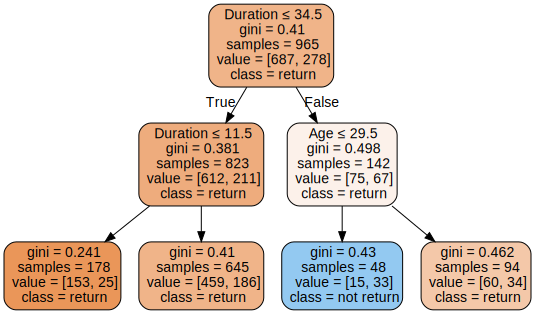

In [12]:
dot_data = export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['return', 'not return'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


# How to test your model?

In [13]:
X.head()

,Age,Sex,Job,Credit amount,Duration,Housing_own,Housing_free,Housing_rent,Purpose_radio/TV,Purpose_education,...,Purpose_domestic appliances,Purpose_repairs,Purpose_vacation/others,Saving accounts_little,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_moderate,Checking account_little,Checking account_moderate,Checking account_rich
0,67,0,2,1169,6,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,22,1,2,5951,48,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,49,0,1,2096,12,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,45,0,2,7882,42,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,53,0,2,4870,24,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


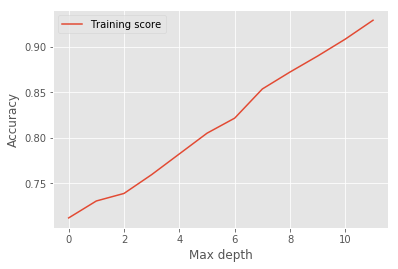

In [14]:
max_depth_range = [1,2,3,4,5,6,7,8,9,10,11,12]


performance = []
for i in max_depth_range:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X,y)
    y_pred = model.predict(X)
    performance.append(accuracy_score(y, y_pred))

plt.ylabel('Accuracy')
plt.xlabel('Max depth') 
plt.plot(performance, label="Training score")
plt.legend(loc="best")

# ... a terrible idea

# Bad and Good Ideas 

In [15]:
from sklearn.model_selection import train_test_split

![title](./data/split_3.png)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2018)

In [17]:
y_train.value_counts(True) #normalize=True

0    0.721992
1    0.278008
Name: Risk, dtype: float64

In [18]:
y_test.value_counts(True)

0    0.681818
1    0.318182
Name: Risk, dtype: float64

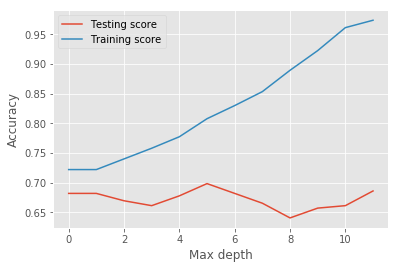

In [19]:
performance_train = []
performance_test = []

for i in max_depth_range:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    performance_test.append(accuracy_score(y_test, y_pred))
    performance_train.append(model.score(X_train,y_train))


    
plt.ylabel('Accuracy')
plt.xlabel('Max depth') 

plt.plot(performance_test, label="Testing score")
plt.plot(performance_train, label="Training score")
plt.legend(loc="best")


### also, a terrible idea...

# Overfitting & Underfitting 

Please look into my slides :)

# Better!

## Cross-Validation

![title](./data/CV.png)


In [20]:
from sklearn.model_selection import cross_val_score


In [21]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
cross_val_score(model, X, y, cv=5, n_jobs=-1)

array([0.63402062, 0.69587629, 0.66839378, 0.69791667, 0.68229167])

In [22]:
# full control on the folds 
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X.head(20)):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 19] TEST: [ 0  1 15 17]
TRAIN: [ 0  1  2  4  6  7  9 10 12 13 14 15 16 17 18 19] TEST: [ 3  5  8 11]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 17 19] TEST: [ 2 13 16 18]
TRAIN: [ 0  1  2  3  5  6  7  8 10 11 13 14 15 16 17 18] TEST: [ 4  9 12 19]
TRAIN: [ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 19] TEST: [ 6  7 10 14]


## Stratified (KFold) Cross-Validation 

![title](./data/cv_2.png)

source: https://scikit-learn.org/stable/modules/cross_validation.html#stratified-shuffle-split


In [23]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X.head(20), y[:20]):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 2  3  5  6  7  8  9 10 11 12 13 14 15 17 19] TEST: [ 0  1  4 16 18]
TRAIN: [ 0  1  2  4  5  6  8 10 11 12 15 16 17 18 19] TEST: [ 3  7  9 13 14]
TRAIN: [ 0  1  3  4  5  7  8  9 10 12 13 14 15 16 17 18] TEST: [ 2  6 11 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 13 14 15 16 18 19] TEST: [10 12 17]
TRAIN: [ 0  1  2  3  4  6  7  9 10 11 12 13 14 16 17 18 19] TEST: [ 5  8 15]


## Time-Series Split Data

![title](./data/time_series_CV.png)


In [24]:
from sklearn.model_selection import TimeSeriesSplit

X_ts = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y_ts = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)  
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X_ts):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_ts[train_index], X_ts[test_index]
    y_train, y_test = y_ts[train_index], y_ts[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


# How to select hyperparameters? 
- Manual Search
- Grid Search
- Random Search
- Bayesian Optimization 
---

# Manual Search  


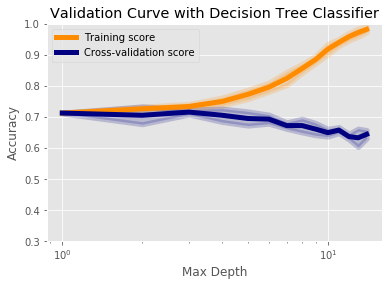

In [25]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1,15,1).tolist()

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0.3, 1)
plt.xscale('linear')

lw = 5
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


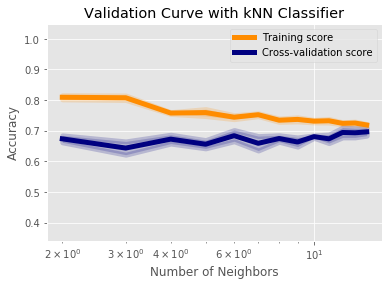

In [26]:
param_range = np.arange(2,15,1)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with kNN Classifier")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.ylim(0.34, 1.05)

lw = 5
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# Grid Search 
aka Brut Force 


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2,3,4,5,6,7,8]}

In [29]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, cv=5, n_jobs=-1)

In [30]:
%%time
grid_search.fit(X,y)

CPU times: user 62.9 ms, sys: 3.85 ms, total: 66.7 ms
Wall time: 188 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [32]:
pvt = pd.pivot_table(pd.DataFrame(grid_search.cv_results_),
    values='mean_test_score', index='param_criterion', columns='param_max_depth')


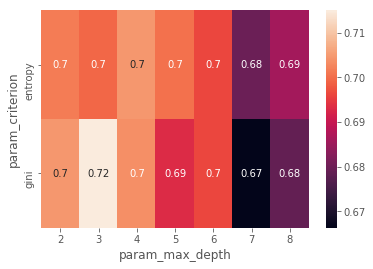

In [33]:
ax = sns.heatmap(pvt, annot=True)

# Random Search 

In [34]:
from sklearn.model_selection import RandomizedSearchCV


In [35]:
n_iter_search = 10
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), 
                                   param_distributions=parameters, 
                                   cv=5, n_jobs=-1, n_iter=n_iter_search)


In [36]:
%%time
random_search.fit(X,y)

CPU times: user 56.2 ms, sys: 3.64 ms, total: 59.8 ms
Wall time: 133 ms


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ('gini', 'entropy'), 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [37]:
random_search.best_params_

{'max_depth': 2, 'criterion': 'gini'}

In [38]:
pvt = pd.pivot_table(pd.DataFrame(random_search.cv_results_),
    values='mean_test_score', index='param_criterion', columns='param_max_depth')


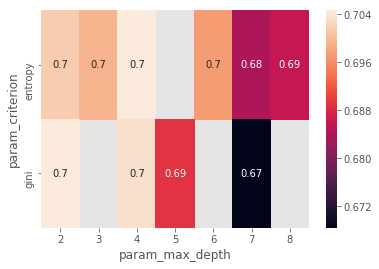

In [39]:
ax = sns.heatmap(pvt, annot=True)

# Bayesian Optimization 
aka Good buddy 

In [40]:
from hyperopt import hp, tpe, fmin, space_eval

In [41]:
def objective(params):
    """
    Objective function to minimize
    """
    x = params['x']
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 1, -26, 36])

    return f(x) * 0.005

Text(0, 0.5, 'f(X)')

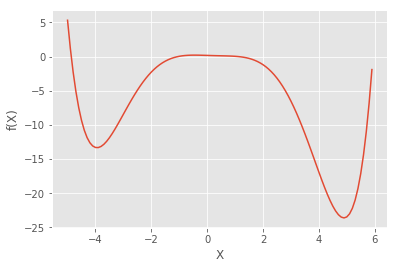

In [42]:
d = {'x':np.arange(-5.0,6.0,0.1)}
plt.plot(np.arange(-5.0,6.0,0.1),objective(d))
plt.xlabel("X")
plt.ylabel("f(X)")

In [43]:
space = {
    'x': hp.uniform('x',-1000,1000)
    #'max_depth': hp.quniform('max_depth', 1, 23, 1),
}


In [44]:
%%time
best = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=20)


CPU times: user 30.1 ms, sys: 0 ns, total: 30.1 ms
Wall time: 29 ms


In [45]:
space_eval(space, best)

{'x': -24.157591766785345}

### Let's find the best hyperparams for our model

In [46]:
def StratifiedKFold_function(X, y, params):
    '''
    CV for hyperopt 
    '''
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    result = []
    # Loop through the indices the split() method returns
    for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
        # Generate batches from indices
        xtrain, xtest = X.values[train_indices], X.values[val_indices]
        ytrain, ytest = y.values[train_indices], y.values[val_indices]
        # Create model
        model = DecisionTreeClassifier(**params)
        model.fit(xtrain, ytrain)
        y_hat = model.predict(xtest)
        score = accuracy_score(ytest, y_hat)
        result.append(score)
    return np.mean(result)



In [47]:
def objective(params):
    """
    Objective function to minimize
    """
    return -StratifiedKFold_function(X,y, params)


In [48]:
space = {
    'max_depth': hp.quniform('max_depth', 1, 23, 1),
    
    'min_samples_split': hp.choice('min_samples_split', np.arange(2, 13, 1, dtype=int) ),
    
    'criterion': hp.choice('criterion', ('entropy',
                                         'gini',)),
    'random_state': 42,
}

In [49]:
%%time
best = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50)


CPU times: user 12.7 s, sys: 7.64 ms, total: 12.8 s
Wall time: 12.8 s


In [50]:
params_from_hyperopt = space_eval(space, best)

In [54]:
print('Accuracy after Bayesian Opt =', StratifiedKFold_function(X, y, params_from_hyperopt))

Accuracy after Bayesian Opt = 0.717124652796325


In [53]:
print('Accuracy after Grid/Random Search =',StratifiedKFold_function(X, y, {'max_depth': 3, 'criterion': 'gini'}))

Accuracy after Grid/Random Search = 0.7087913194629916


# Main Takeaways: 
- Overfitting is a modeling error which occurs when a function is too closely fit a limited set of data points. Overfitting the model generally takes the form of making an overly complex model to explain idiosyncrasies in the data under study. 
- Underfitting (opposite of overfitting) refers to a model that can neither model the training data nor generalize to new data.
- Use Cross-Validation for the hyperparameters selection.
- If you have a tremendous amount of computation power and time use the greed search for the model comparing, otherwise try to find more intelligent ways such as Bayesian optimization.  

# Further Reading 

Steven L. Salzberg, On Comparing Classifiers: Pitfalls to Avoid and a
Recommended Approac. Link: http://www.cs.ru.nl/~tomh/onderwijs/lrs/lrs_files/salzberg97comparing.pdf

Overfitting and Underfitting With Machine Learning Algorithms, https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/